In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import sweetviz as sw

## Heading and some info about DF

In [2]:
df = pd.read_csv('AQI and Lat Long of Countries.csv')
df.head()

,Country,City,AQI Value,AQI Category,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,PM2.5 AQI Value,PM2.5 AQI Category,lat,lng
0,Russian Federation,Praskoveya,51,Moderate,1,Good,36,Good,0,Good,51,Moderate,44.7444,44.2031
1,Brazil,Presidente Dutra,41,Good,1,Good,5,Good,1,Good,41,Good,-5.2900,-44.4900
2,Brazil,Presidente Dutra,41,Good,1,Good,5,Good,1,Good,41,Good,-11.2958,-41.9869
3,Italy,Priolo Gargallo,66,Moderate,1,Good,39,Good,2,Good,66,Moderate,37.1667,15.1833
4,Poland,Przasnysz,34,Good,1,Good,34,Good,0,Good,20,Good,53.0167,20.8833


In [3]:
df.shape

(16695, 14)

In [4]:
df.describe()

,AQI Value,CO AQI Value,Ozone AQI Value,NO2 AQI Value,PM2.5 AQI Value,lat,lng
count,16695.000000,16695.000000,16695.000000,16695.000000,16695.000000,16695.000000,16695.000000
mean,62.998682,1.342138,31.767355,3.819647,59.821324,30.267148,-3.944485
std,43.091971,2.371379,22.839343,5.880677,43.208298,22.947398,73.037148
min,7.000000,0.000000,0.000000,0.000000,0.000000,-54.801900,-171.750000
25%,38.500000,1.000000,20.000000,0.000000,34.000000,16.515450,-75.180000
50%,52.000000,1.000000,29.000000,2.000000,52.000000,38.815800,5.643100
75%,69.000000,1.000000,38.000000,5.000000,69.000000,46.683300,36.275000
max,500.000000,133.000000,222.000000,91.000000,500.000000,70.767000,178.017800


In [5]:
df.describe(include=['O'])

,Country,City,AQI Category,CO AQI Category,Ozone AQI Category,NO2 AQI Category,PM2.5 AQI Category
count,16393,16695,16695,16695,16695,16695,16695
unique,174,14229,6,3,5,2,6
top,United States of America,Santa Cruz,Good,Good,Good,Good,Good
freq,3954,17,7708,16691,15529,16684,7936


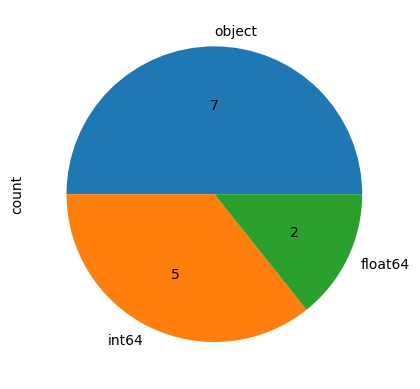

In [6]:
types_counts = df.dtypes.value_counts()
types_counts.plot.pie(autopct=lambda p: '{:.0f}'.format(p * sum(types_counts) / 100)) 
plt.show()

In [7]:
numeric_features = []
categorical_features = []

for column in df.columns:
    if df[column].dtype in ['int64', 'float64']:
        numeric_features.append(column)
    elif df[column].dtype == 'object':
        categorical_features.append(column)

print("Numeric Features:", numeric_features)
print(125 * '-')
print("Categorical Features:", categorical_features)

Numeric Features: ['AQI Value', 'CO AQI Value', 'Ozone AQI Value', 'NO2 AQI Value', 'PM2.5 AQI Value', 'lat', 'lng']
-----------------------------------------------------------------------------------------------------------------------------
Categorical Features: ['Country', 'City', 'AQI Category', 'CO AQI Category', 'Ozone AQI Category', 'NO2 AQI Category', 'PM2.5 AQI Category']


In [8]:
df.isnull().sum()

Country               302
City                    0
AQI Value               0
AQI Category            0
CO AQI Value            0
CO AQI Category         0
Ozone AQI Value         0
Ozone AQI Category      0
NO2 AQI Value           0
NO2 AQI Category        0
PM2.5 AQI Value         0
PM2.5 AQI Category      0
lat                     0
lng                     0
dtype: int64

In [9]:
def count_missings(df):
    missing_values = df.isnull().sum()
    missing_percentage = (missing_values / len(df)) * 100
    missing_df = pd.concat([missing_values, missing_percentage], axis=1)
    missing_df.columns = ['Missing Count', 'Missing %']
    missing_df_sorted = missing_df[missing_df['Missing %'] > 0.01].sort_values(by='Missing %', ascending=False)
    
    return missing_df_sorted

In [10]:
count_missings(df)

,Missing Count,Missing %
Country,302,1.808925


In [11]:
df = df.dropna(subset=['Country'])
df.shape

(16393, 14)

In [12]:
# report = sw.analyze([df, "AQI Category"])

In [13]:
# report.show_html('AQI Category Analysis.html')

## Exploring our target value

In [14]:
df['AQI Category'].describe()

count     16393
unique        6
top        Good
freq       7513
Name: AQI Category, dtype: object

In [15]:
df['AQI Category'].value_counts()

AQI Category
Good                              7513
Moderate                          6964
Unhealthy                          864
Unhealthy for Sensitive Groups     859
Very Unhealthy                     131
Hazardous                           62
Name: count, dtype: int64

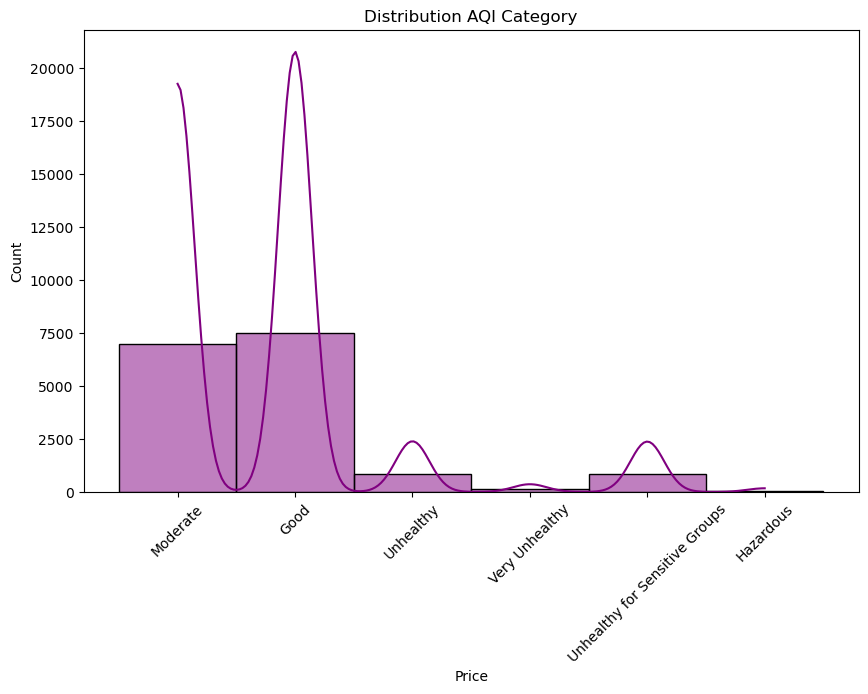

In [16]:
plt.figure(figsize=(10, 6))
sns.histplot(df['AQI Category'], kde=True, color='purple')
plt.title('Distribution AQI Category')
plt.xlabel('Price')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [17]:
#### droping useless columns
df = df.drop(['lat', 'lng'], axis = 1)
df.shape

(16393, 12)

<Figure size 2500x2000 with 0 Axes>

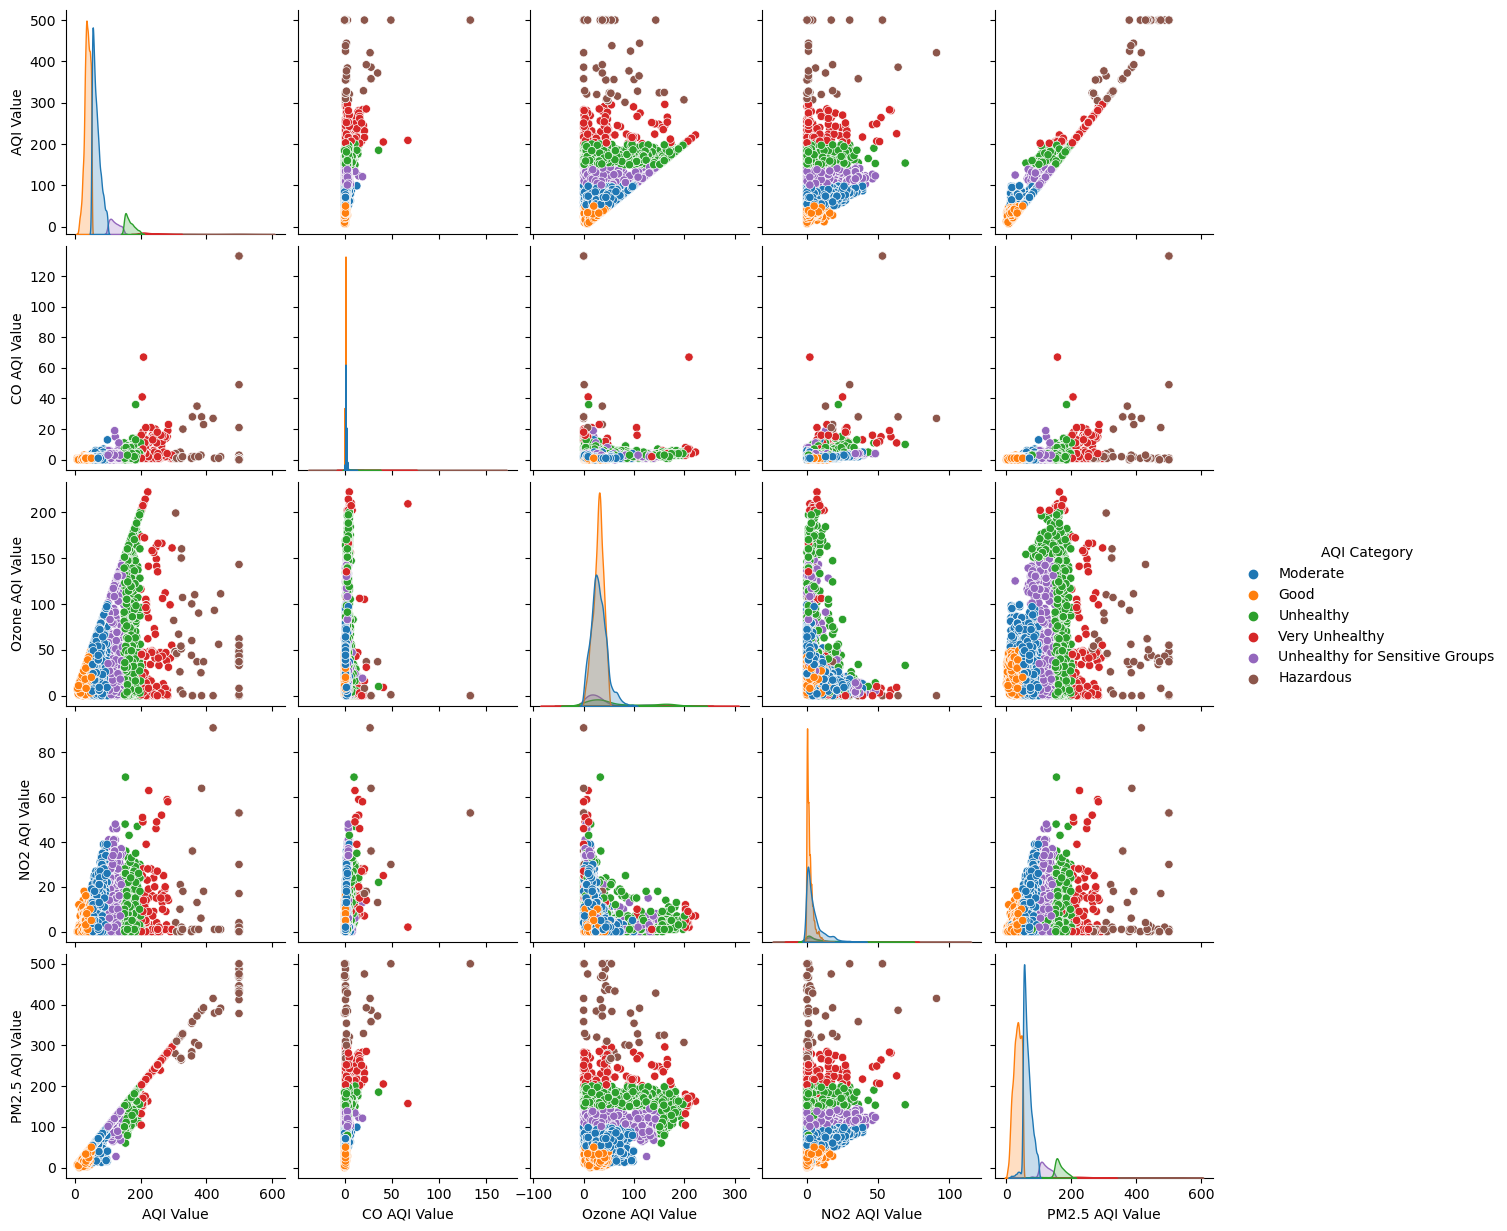

In [18]:
plt.figure(figsize=(25,20))
sns.pairplot(df, hue='AQI Category')
plt.show()

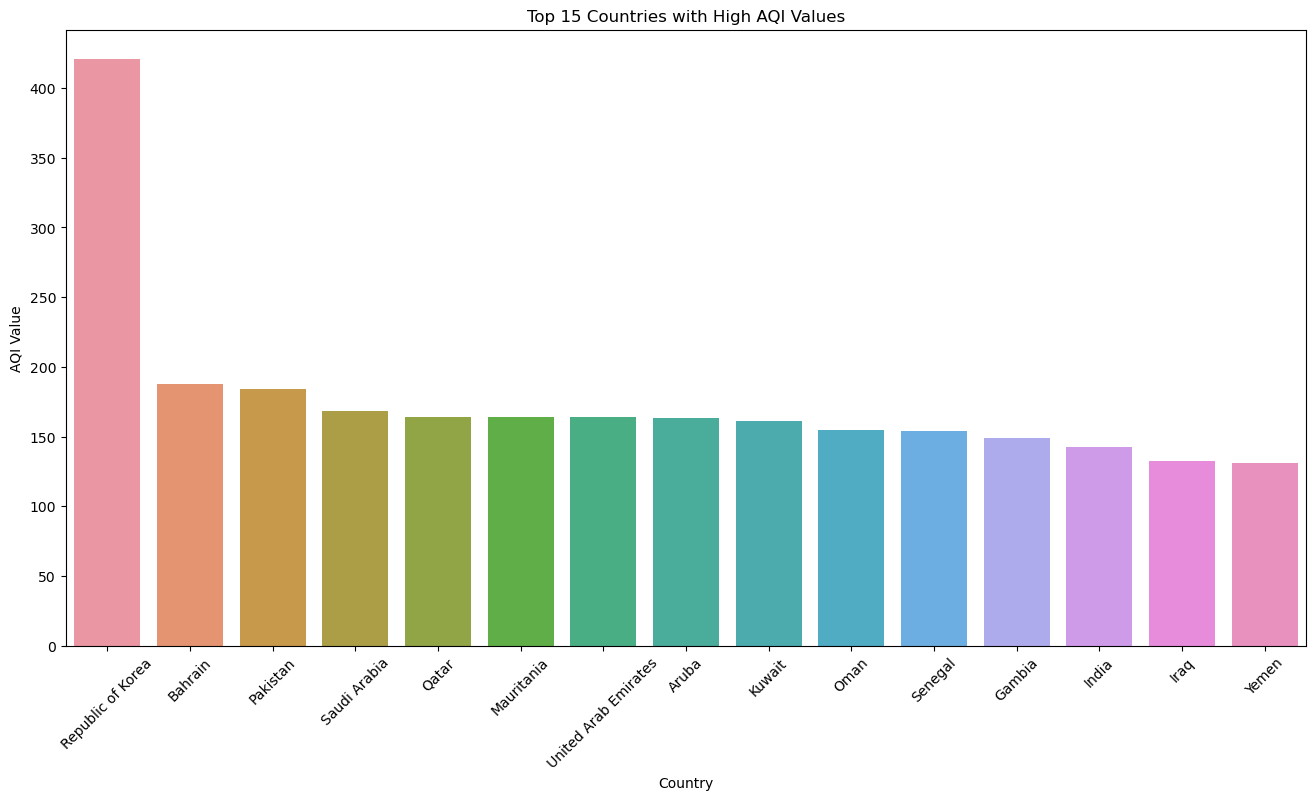

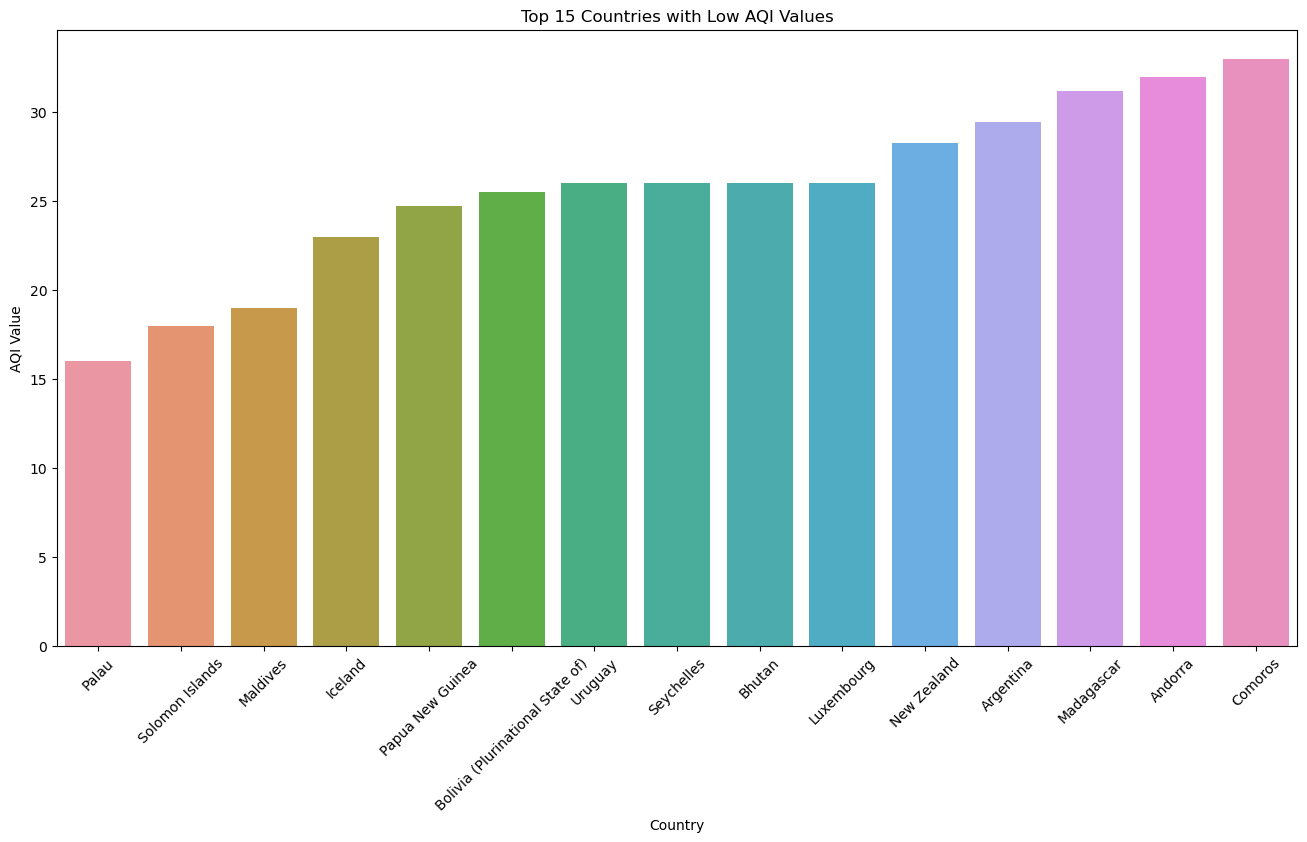

In [19]:
highaqi_avg = df.groupby('Country')['AQI Value'].mean().sort_values(ascending=False)[:15].reset_index()

#Top 15 countries with the lowest average AQI value
lowaqi_avg = df.groupby('Country')['AQI Value'].mean().sort_values(ascending=True)[:15].reset_index()

plt.figure(figsize=(16, 8))
plt.xticks(rotation=45)
sns.barplot(data=highaqi_avg, y='AQI Value', x='Country')
plt.title('Top 15 Countries with High AQI Values');
plt.show()
plt.figure(figsize=(16, 8))
plt.xticks(rotation=45)
sns.barplot(data=lowaqi_avg, y='AQI Value', x='Country')
plt.title('Top 15 Countries with Low AQI Values');
plt.show()

## Label Encoding

In [20]:
label_encoding_map = {}


features_label_encoding = ['AQI Category']


def label_encode(feature):
    unique_categories = df[feature].unique()  
    encoding_map = {category: idx for idx, category in enumerate(unique_categories)}  
    df[feature] = df[feature].map(encoding_map)  
    label_encoding_map[feature] = encoding_map  

for feature in features_label_encoding:
    label_encode(feature)

In [21]:
df['AQI Category'].value_counts()

AQI Category
1    7513
0    6964
2     864
4     859
3     131
5      62
Name: count, dtype: int64

In [22]:
df

,Country,City,AQI Value,AQI Category,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,PM2.5 AQI Value,PM2.5 AQI Category
0,Russian Federation,Praskoveya,51,0,1,Good,36,Good,0,Good,51,Moderate
1,Brazil,Presidente Dutra,41,1,1,Good,5,Good,1,Good,41,Good
2,Brazil,Presidente Dutra,41,1,1,Good,5,Good,1,Good,41,Good
3,Italy,Priolo Gargallo,66,0,1,Good,39,Good,2,Good,66,Moderate
4,Poland,Przasnysz,34,1,1,Good,34,Good,0,Good,20,Good
...,...,...,...,...,...,...,...,...,...,...,...,...
16690,United States of America,Highland Springs,54,0,1,Good,34,Good,5,Good,54,Moderate
16691,Slovakia,Martin,71,0,1,Good,39,Good,1,Good,71,Moderate
16692,Slovakia,Martin,71,0,1,Good,39,Good,1,Good,71,Moderate
16693,France,Sceaux,50,1,1,Good,20,Good,5,Good,50,Good


We don't need further category columns, as they represent the same and will affect badly on our model, so I decided to drop them

In [23]:
df = df.drop(['Country', 'City', 'CO AQI Category', 'Ozone AQI Category', 'NO2 AQI Category', 'PM2.5 AQI Category' ], axis = 1)
df

,AQI Value,AQI Category,CO AQI Value,Ozone AQI Value,NO2 AQI Value,PM2.5 AQI Value
0,51,0,1,36,0,51
1,41,1,1,5,1,41
2,41,1,1,5,1,41
3,66,0,1,39,2,66
4,34,1,1,34,0,20
...,...,...,...,...,...,...
16690,54,0,1,34,5,54
16691,71,0,1,39,1,71
16692,71,0,1,39,1,71
16693,50,1,1,20,5,50


In [24]:
df = df[['AQI Category', 'AQI Value', 'CO AQI Value', 'Ozone AQI Value', 'NO2 AQI Value', 'PM2.5 AQI Value']]
df

,AQI Category,AQI Value,CO AQI Value,Ozone AQI Value,NO2 AQI Value,PM2.5 AQI Value
0,0,51,1,36,0,51
1,1,41,1,5,1,41
2,1,41,1,5,1,41
3,0,66,1,39,2,66
4,1,34,1,34,0,20
...,...,...,...,...,...,...
16690,0,54,1,34,5,54
16691,0,71,1,39,1,71
16692,0,71,1,39,1,71
16693,1,50,1,20,5,50


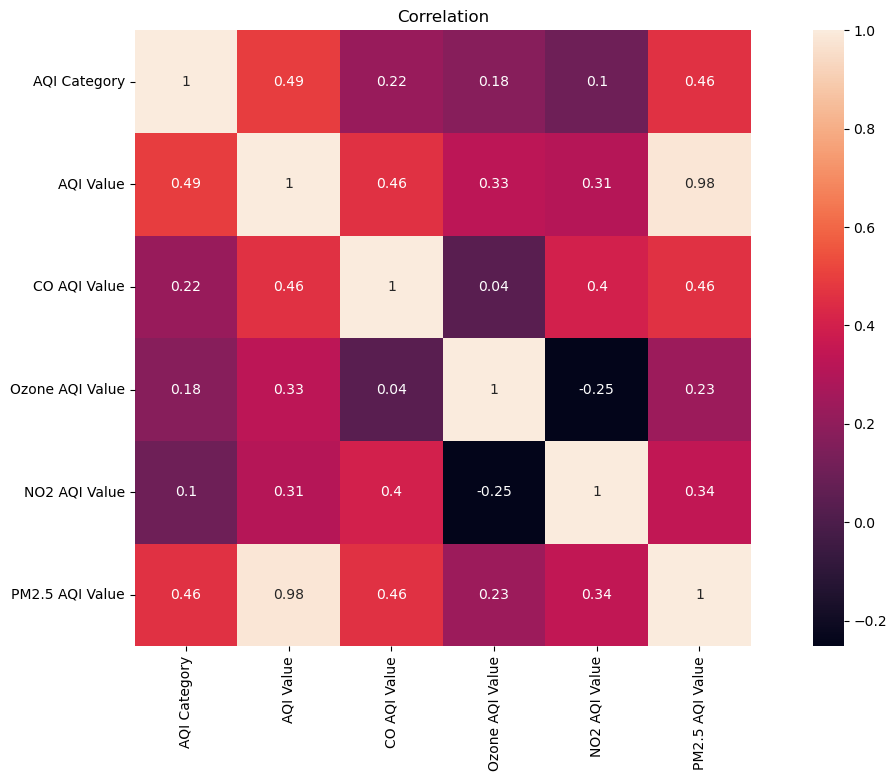

In [25]:
plt.figure(figsize=(16,8))
sns.heatmap(df.corr(),annot=True,square=True)
plt.title("Correlation");

In [26]:
df1 = df.copy()
df1

,AQI Category,AQI Value,CO AQI Value,Ozone AQI Value,NO2 AQI Value,PM2.5 AQI Value
0,0,51,1,36,0,51
1,1,41,1,5,1,41
2,1,41,1,5,1,41
3,0,66,1,39,2,66
4,1,34,1,34,0,20
...,...,...,...,...,...,...
16690,0,54,1,34,5,54
16691,0,71,1,39,1,71
16692,0,71,1,39,1,71
16693,1,50,1,20,5,50


In [27]:
### df1.to_csv('For Lab2.csv', index=False)

## Modeling

We have 5 methods, but not for all of them we need to scale our data:
- SVM, KNN: scaling
- Random Forest, Desicion Tree: no need
- AdaBoost: 50/50 
    
Let's start with those, where we don't need

In [28]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split

In [29]:
X=df.drop(['AQI Category'], axis=1)
y=df['AQI Category'].values

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,stratify=y)

## Decision Tree

In [31]:
tree = DecisionTreeClassifier(criterion='entropy', max_depth=5).fit(X_train,y_train)
y_pred=tree.predict(X_test)

In [32]:
print("Decision Tree accuracy score : ", accuracy_score(y_test, y_pred))
report = classification_report(y_test, y_pred)
print(report)

Decision Tree accuracy score :  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1393
           1       1.00      1.00      1.00      1503
           2       1.00      1.00      1.00       173
           3       1.00      1.00      1.00        26
           4       1.00      1.00      1.00       172
           5       1.00      1.00      1.00        12

    accuracy                           1.00      3279
   macro avg       1.00      1.00      1.00      3279
weighted avg       1.00      1.00      1.00      3279



In [33]:
def plot_confusion_matrix(y_test, y_pred, title):
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm', cbar=False)
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title(title)
    plt.show()

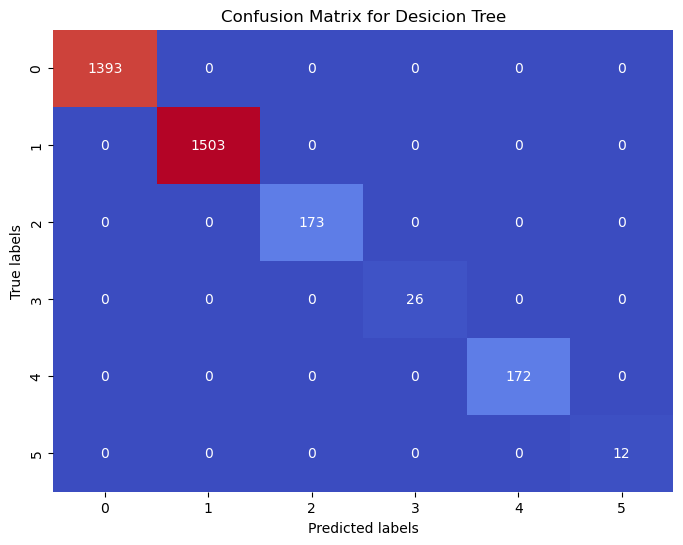

In [34]:
plot_confusion_matrix(y_test, y_pred, title='Confusion Matrix for Desicion Tree')

## Random Forest

In [35]:
rf = RandomForestClassifier(criterion='entropy', max_depth=5).fit(X_train,y_train)
y_pred=rf.predict(X_test)

In [36]:
print("Random Forest accuracy score : ", accuracy_score(y_test, y_pred))
report = classification_report(y_test, y_pred)
print(report)

Random Forest accuracy score :  0.9993900579444953
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1393
           1       1.00      1.00      1.00      1503
           2       1.00      1.00      1.00       173
           3       0.93      1.00      0.96        26
           4       1.00      1.00      1.00       172
           5       1.00      0.83      0.91        12

    accuracy                           1.00      3279
   macro avg       0.99      0.97      0.98      3279
weighted avg       1.00      1.00      1.00      3279



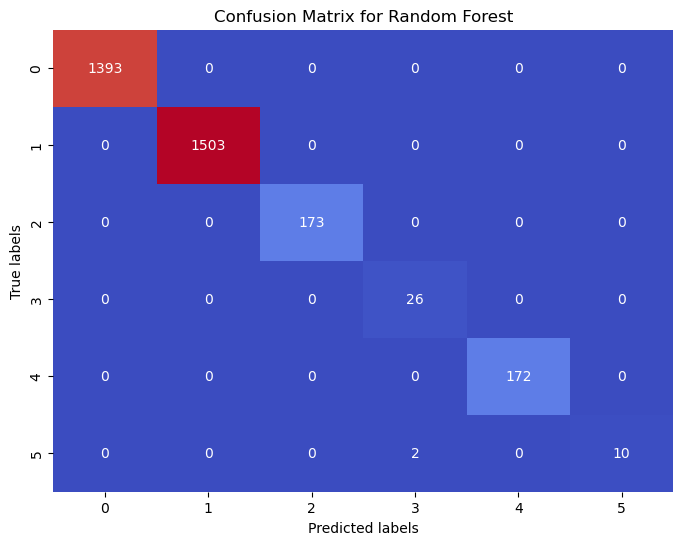

In [37]:
plot_confusion_matrix(y_test, y_pred, title='Confusion Matrix for Random Forest')

## AdaBoost

In [38]:
AdaBoost = AdaBoostClassifier(n_estimators=100).fit(X_train,y_train)
y_pred=AdaBoost.predict(X_test)

In [39]:
print("AdaBoost accuracy score : ", accuracy_score(y_test, y_pred))
report = classification_report(y_test, y_pred)
print(report)

AdaBoost accuracy score :  0.8868557487038732
              precision    recall  f1-score   support

           0       0.79      1.00      0.88      1393
           1       1.00      1.00      1.00      1503
           2       0.00      0.00      0.00       173
           3       0.00      0.00      0.00        26
           4       0.00      0.00      0.00       172
           5       1.00      1.00      1.00        12

    accuracy                           0.89      3279
   macro avg       0.46      0.50      0.48      3279
weighted avg       0.80      0.89      0.84      3279



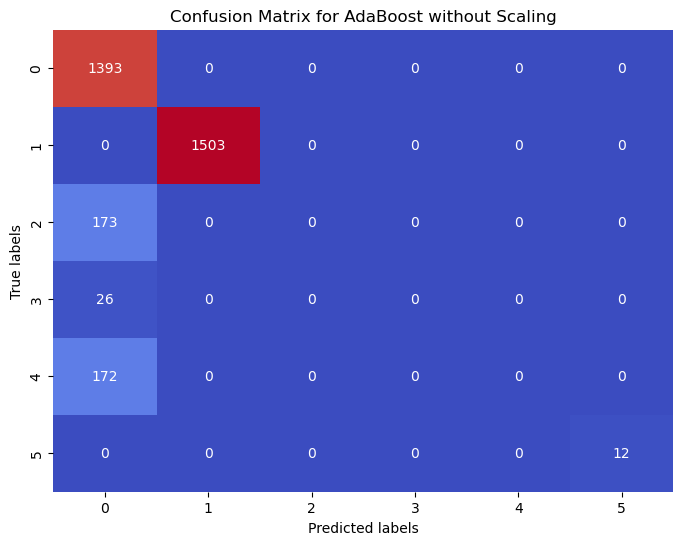

In [40]:
plot_confusion_matrix(y_test, y_pred, title='Confusion Matrix for AdaBoost without Scaling')

## Now scaling our data for more sensitive algorithms 

In [42]:
X1 = df1.drop(['AQI Category'], axis=1)
y1 = df1['AQI Category'].values

In [43]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X1_scaled = scaler.fit_transform(X1)

In [45]:
pd.DataFrame(X1_scaled, columns=X1.columns)

,AQI Value,CO AQI Value,Ozone AQI Value,NO2 AQI Value,PM2.5 AQI Value
0,0.089249,0.007519,0.162162,0.000000,0.102
1,0.068966,0.007519,0.022523,0.010989,0.082
2,0.068966,0.007519,0.022523,0.010989,0.082
3,0.119675,0.007519,0.175676,0.021978,0.132
4,0.054767,0.007519,0.153153,0.000000,0.040
...,...,...,...,...,...
16388,0.095335,0.007519,0.153153,0.054945,0.108
16389,0.129817,0.007519,0.175676,0.010989,0.142
16390,0.129817,0.007519,0.175676,0.010989,0.142
16391,0.087221,0.007519,0.090090,0.054945,0.100


In [46]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1_scaled, y1, test_size=0.2, stratify=y1)

In [47]:
X1_scaled.shape

(16393, 5)

### KNN

In [48]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [49]:
knn = KNeighborsClassifier()

In [50]:
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],  
    'weights': ['uniform', 'distance'],  
    'metric': ['euclidean', 'manhattan', 'minkowski'] 
}

In [51]:
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X1_train, y1_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['euclidean', 'manhattan', 'minkowski'],
                         'n_neighbors': [3, 5, 7, 9, 11],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [52]:
print(f"Найкращі параметри: {grid_search.best_params_}")

Найкращі параметри: {'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'distance'}


In [53]:
best_knn = grid_search.best_estimator_

In [54]:
y_pred = best_knn.predict(X1_test)

In [55]:
print("KNN : ", accuracy_score(y1_test, y_pred))
report = classification_report(y1_test, y_pred)
print(report)

KNN :  0.9896309850564197
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1393
           1       0.99      1.00      0.99      1503
           2       0.96      0.99      0.97       173
           3       0.92      0.85      0.88        26
           4       0.98      0.96      0.97       172
           5       1.00      0.92      0.96        12

    accuracy                           0.99      3279
   macro avg       0.97      0.95      0.96      3279
weighted avg       0.99      0.99      0.99      3279



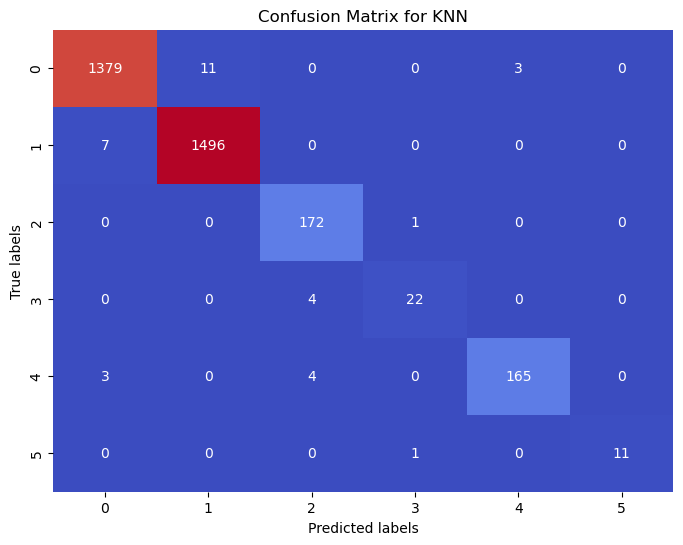

In [56]:
plot_confusion_matrix(y1_test, y_pred, title='Confusion Matrix for KNN')

### SVM

In [57]:
from sklearn.svm import SVC  

In [58]:
svm = SVC()

In [59]:
param_grid = {
    'C': [0.1, 1, 5, 10],
    'kernel': ['linear', 'poly', 'rbf'] ,
    'gamma': ['scale', 'auto', 0.1, 1, 10]  
}

In [60]:
grid_search = GridSearchCV(estimator=svm, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X1_train, y1_train)

GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 5, 10],
                         'gamma': ['scale', 'auto', 0.1, 1, 10],
                         'kernel': ['linear', 'poly', 'rbf']},
             scoring='accuracy')

In [61]:
print(f"Найкращі параметри: {grid_search.best_params_}")

Найкращі параметри: {'C': 5, 'gamma': 'scale', 'kernel': 'poly'}


In [62]:
best_svm = grid_search.best_estimator_

In [63]:
y_pred = best_svm.predict(X1_test)

In [64]:
print("SVM : ", accuracy_score(y1_test, y_pred))
report = classification_report(y1_test, y_pred)
print(report)

SVM :  0.9963403476669717
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1393
           1       1.00      1.00      1.00      1503
           2       0.98      0.99      0.99       173
           3       0.96      0.92      0.94        26
           4       0.99      0.98      0.99       172
           5       1.00      0.92      0.96        12

    accuracy                           1.00      3279
   macro avg       0.99      0.97      0.98      3279
weighted avg       1.00      1.00      1.00      3279



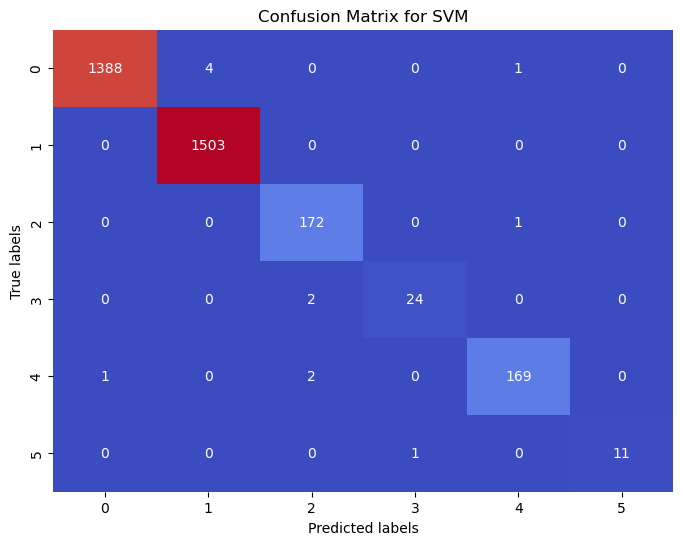

In [65]:
plot_confusion_matrix(y1_test, y_pred, title='Confusion Matrix for SVM')

## Results

In [68]:
results = pd.DataFrame({'Algorithm': ['Desicion Tree', 'Random Forest', 'AdaBoost', 'KNN', 'SVM'], 'Score': [1.0, 0.999, 0.886, 0.989, 0.996]})

results

,Algorithm,Score
0,Desicion Tree,1.000
1,Random Forest,0.999
2,AdaBoost,0.886
3,KNN,0.989
4,SVM,0.996
